In [1]:
from sosatpy.SOSATpopy import sosat
import matplotlib.pyplot as plt
freq_list = [90]#[78,80,82,84,86,88,90,92,94,96,98,100,102] 
dx_list = [180]#[20,60,100,160,180]


10


In [2]:
Polarization_offset = {'Ideal': {},
                       'Normal': {},
                       'leaning': {}}


Gain 42.531431611474574
42.531431611474574 0.240156574279636
False 7.65689219797308e-05
rotation angle method 3:  [0.] 2
False 5.900278295538487e-05
rotation angle method 2:  [0.] 2
False 5.953152262348044e-26
rotation angle method 1:  [0.] 2


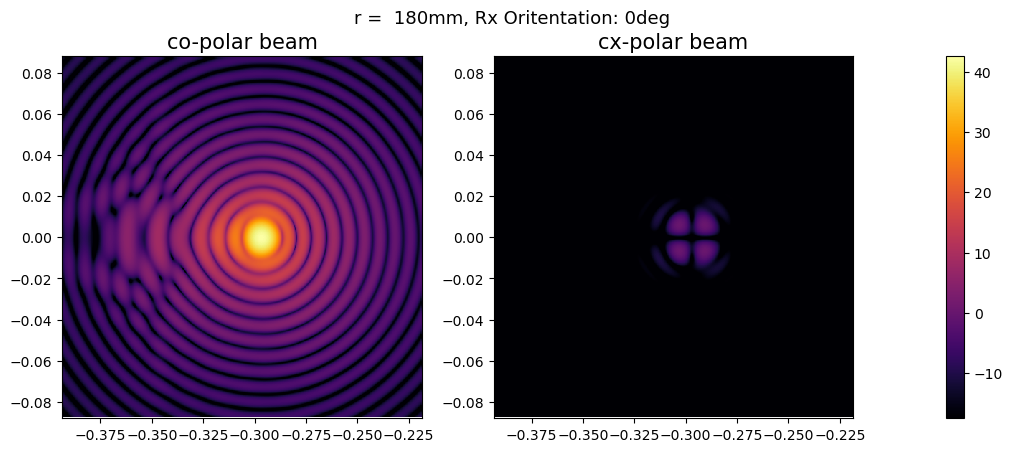

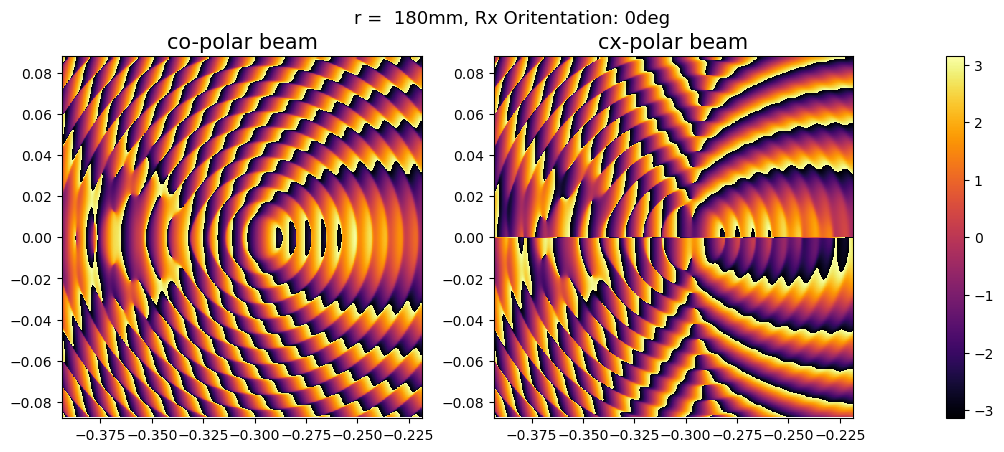

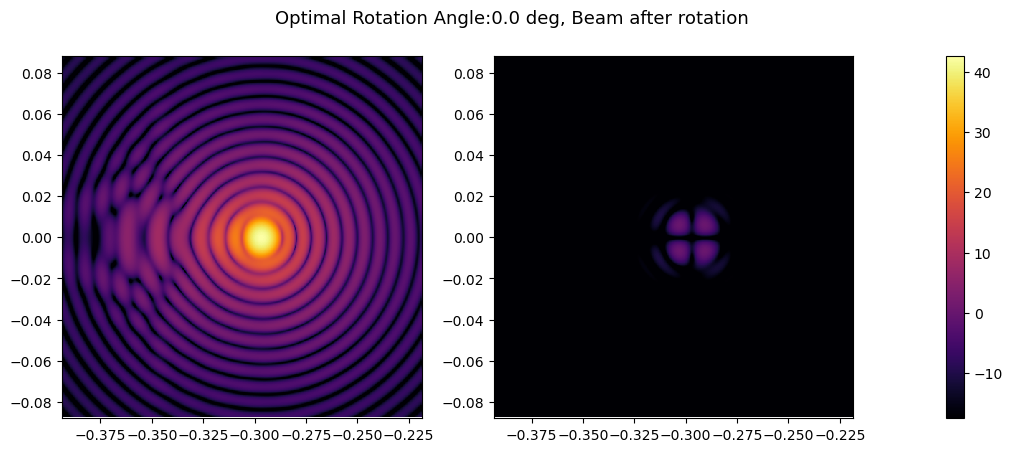

AttributeError: 'dict' object has no attribute 'append'

In [3]:
for freq in freq_list:
    for item in dx_list:
        for angle in [0]:
            Model1 = sosat(freq,
                        feedpos = [item,0,0],
                        feedrot = [0,0,angle],
                        AR_file = 'AR_LIB/Ideal_AR.h5',
                        groupname= 'Ideal_AR',
                        outputfolder = '../Data/output2_noAR/'+str(freq)+'GHz/')
            dA = Model1.plot_beam(cmap = 'inferno')
            Polarization_offset['Ideal'].append(dA[0])


Gain 51.534974109369045
51.534974109369045 5.408111382160827
False 3.0282369715926672e-05
rotation angle method 3:  [0.] 2
False 2.439572489529582e-05
rotation angle method 2:  [0.] 2
False 9.554241568199112e-28
rotation angle method 1:  [0.] 2


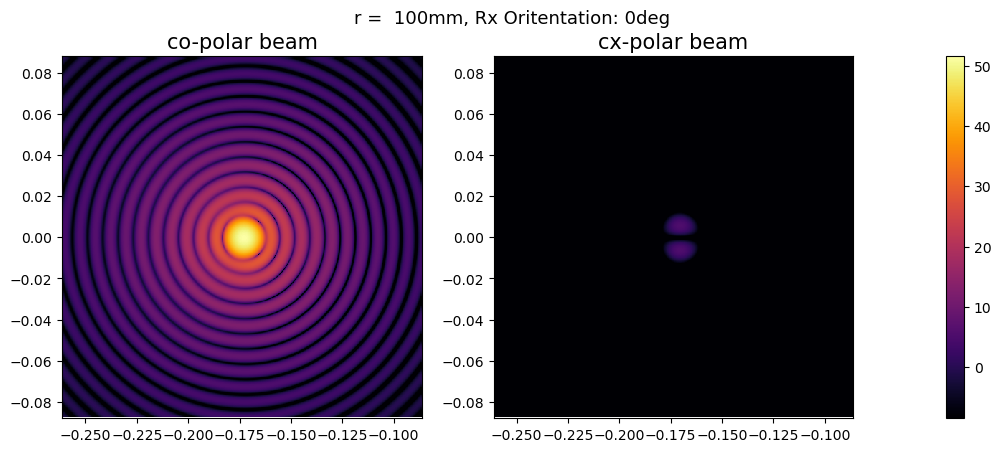

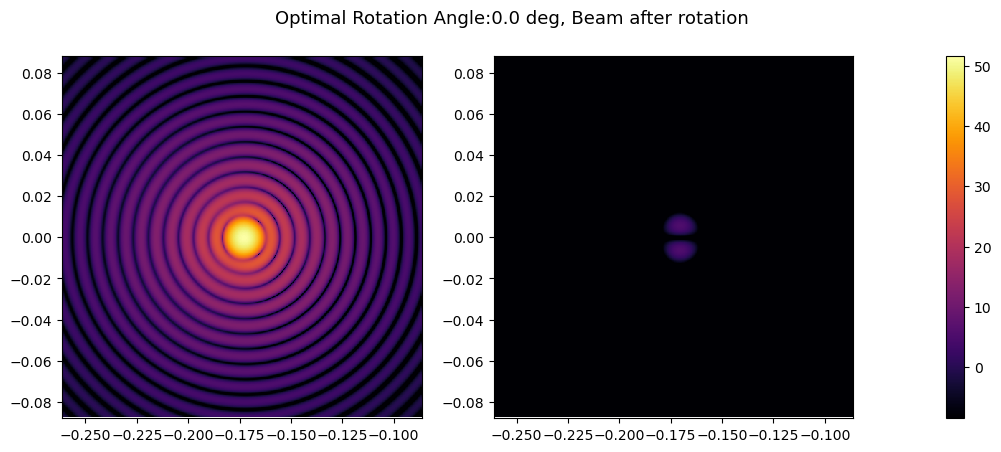

In [5]:
for freq in freq_list:
    Polarization_offset['Ideal'][str(freq)] = []
    for item in dx_list:
        for angle in [0]:
            Model1 = sosat(freq,
                        feedpos = [item,0,0],
                        feedrot = [0,0,angle],
                        AR_file = 'AR_LIB/Ideal_AR.h5',
                        groupname= 'Ideal_AR',
                        outputfolder = '../Data/output_polar_ideal_AR/'+str(freq)+'GHz/')
            dA = Model1.plot_beam(cmap = 'inferno')
            Polarization_offset['Ideal'][str(freq)].append(dA[0])


90 GHz:
Gain 51.07761640027037
48.057167218607084 48.07744200575722
True 0.00012261794071289814
rotation angle method 3:  [0.04747597] 0
True 9.12767939075438e-05
rotation angle method 2:  [-0.20315265] 0
True 9.466446814089165e-08
rotation angle method 1:  [0.06687003] 0


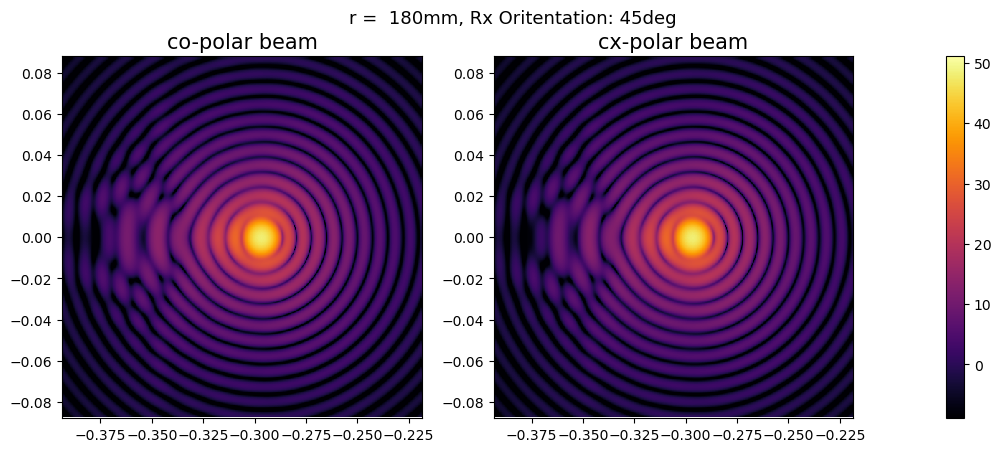

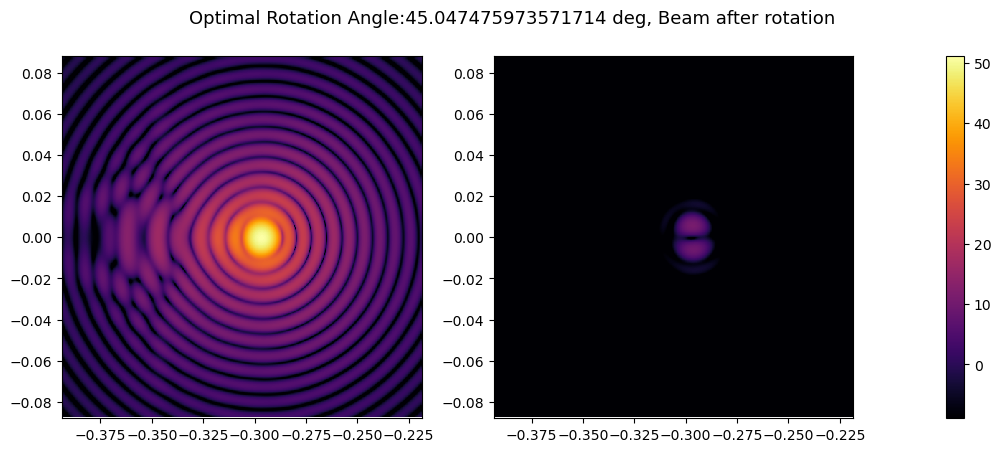

In [4]:
for freq in freq_list:
    Polarization_offset['Normal'][str(freq)] = []
    for item in dx_list:
        for angle in [45]:
            print(freq,'GHz:')
            Model1 = sosat(freq,
                        feedpos = [item,0,0],
                        feedrot = [0,0,angle],
                        AR_file = 'AR_LIB/normal_groove_AR.h5',
                        groupname= str(freq)+'GHz',
                        outputfolder = '../Data/output_polar_normal_groove_AR/'+str(freq)+'GHz/')
            dA = Model1.plot_beam(cmap = 'inferno',plot = True)
            Polarization_offset['Normal'][str(freq)].append(dA[0])


Gain 51.05491111342086
48.03797169506091 48.05124048363365
True 0.00012281349607337665
rotation angle method 3:  [0.0327521] 0
True 9.327391275085579e-05
rotation angle method 2:  [-0.18837983] 0
True 6.174130722770583e-08
rotation angle method 1:  [0.04376282] 0


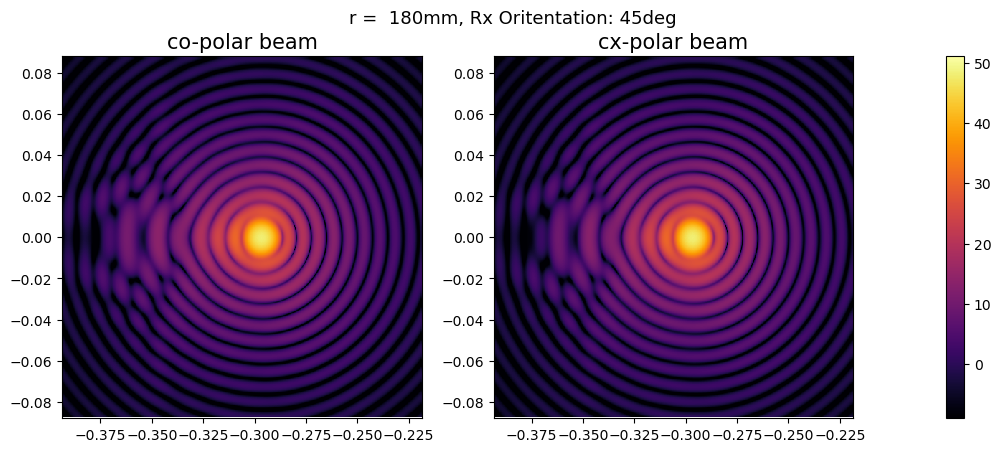

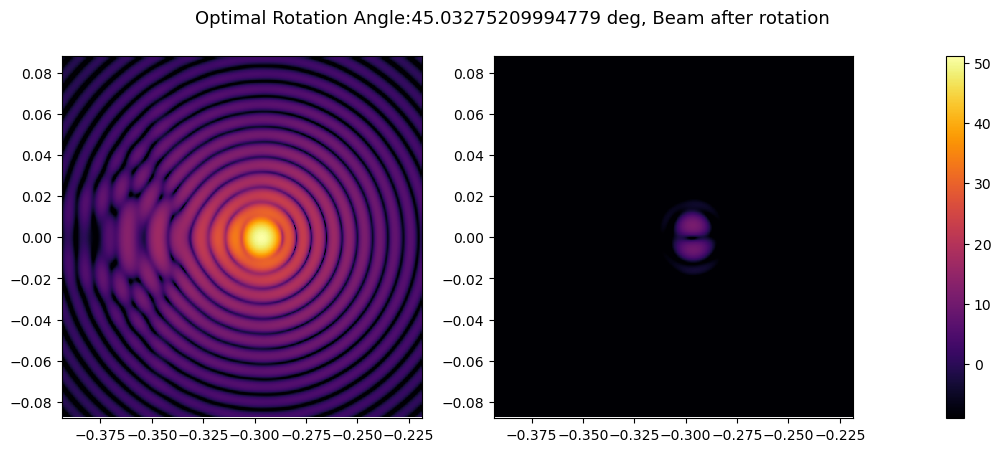

In [13]:
for freq in freq_list:
    Polarization_offset['leaning'][str(freq)] = []
    for item in dx_list:
        for angle in [45]:
            Model1 = sosat(freq,
                        feedpos = [item,0,0],
                        feedrot = [0,0,45],
                        AR_file = 'AR_LIB/leaning_groove_AR.h5',
                        groupname= str(freq)+'GHz',
                        outputfolder = '../Data/output_polar_leaning_groove_AR/'+str(freq)+'GHz/')
            dA = Model1.plot_beam(cmap = 'inferno',plot = True)
            Polarization_offset['leaning'][str(freq)].append(dA[0])


In [ ]:
Polarization_offset['Ideal']


In [ ]:
import numpy as np
dx_list_grasp = [0,20,60,100,160,180]
offset_graps = -np.array([ 0.        , -0.06681291, -0.51784647, -1.24199156, -2.58424386,
       -3.15499397])


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(dx_list, Polarization_offset['Ideal'], label='Ideal AR', marker='o')
ax.plot(dx_list, Polarization_offset['Normal'], label='Normal 3-layer Groove AR', marker='o')
ax.plot(dx_list_grasp, offset_graps , label='no AR', marker='o')
#ax.plot(dx_list, Polarization_offset['leaning'], label='30deg Leaning 3-layer Groove AR', marker='o')
ax.set_xlabel('Feed Offset (mm)',fontsize = 14)
ax.set_ylabel('Polarization Offset (degrees)',fontsize = 14)
ax.set_title('Polarization Offset for Feedhorn roated by 45 degrees',fontsize = 14)
ax.legend(fontsize =14)
plt.grid()
plt.savefig('ARC_effects on Polarization rotation.png')


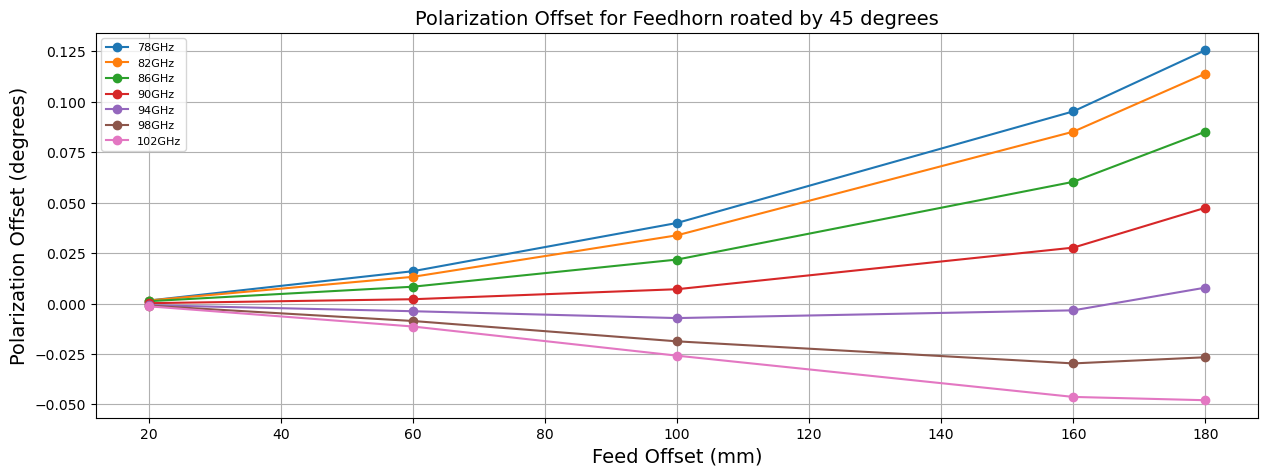

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for freq in [78,82, 86, 90, 94, 98, 102]:
    ax.plot(dx_list, Polarization_offset['Normal'][str(freq)], label=str(freq)+'GHz', marker='o')
#ax.plot(dx_list, Polarization_offset['leaning'], label='30deg Leaning 3-layer Groove AR', marker='o')
ax.set_xlabel('Feed Offset (mm)',fontsize = 14)
ax.set_ylabel('Polarization Offset (degrees)',fontsize = 14)
ax.set_title('Polarization Offset for Feedhorn roated by 45 degrees',fontsize = 14)
ax.legend(fontsize =8,loc = 'upper left')
plt.grid()
plt.savefig('ARC_effects on Polarization rotation_90GHz_band.png')
